In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import RandomState
from sklearn import datasets
from sklearn import decomposition
from sklearn.cluster import MiniBatchKMeans

In [3]:
rng = RandomState(0)
faces, _ = datasets.fetch_olivetti_faces(return_X_y = True, shuffle = True, random_state = rng)
sizex = len(faces)
n_row, n_col = 2, 3
n_components = n_row * n_col
image_shape = (64, 64)
rng = RandomState(0)
n_samples, n_features = faces.shape
faces_centered = faces - faces.mean(axis=0)
faces_centered -= faces_centered.mean(axis=1).reshape(n_samples, -1)

In [4]:
len(faces)

400

In [5]:
faces_centered.shape

(400, 4096)

In [6]:
def plot(imagem):
    plt.figure()
    for i, comp in enumerate(imagem):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                       interpolation='nearest',
                       vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
        if i == (n_row*n_col)-1:
            break
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [7]:
W = np.random.rand(1,faces.shape[1])

In [8]:
def ortogonalizacao(matriz, ref = False, refmat= 0 ):
    ortonormais = list()
    ortogonais = list()
    for N,v in enumerate(matriz):
        if ref == False:
            if N == 0:
                v = v
        else:
            if N == 0:
                v = refmat
        if N!= 0:
            for y in range(0,N):
                v = v - ((v.dot(ortogonais[y])/ortogonais[y].dot(ortogonais[y]))*ortogonais[y])
        e = v/np.linalg.norm(v)
        ortonormais.append(e)
        ortogonais.append(v)
    ortonormais = np.array(ortonormais)
    return ortonormais[0]

In [9]:
def principal(W, a,ref=False, refmat = 0):
    global faces_centered
    global sizex
    if ref == True:
        Wlist= list()
    for n in range(sizex):
        y = (W).dot(faces_centered[n,:])
        c = (faces_centered[n,:].T)*(y)
        d = y*y*(W)
        dw = a*(c - d)
        W1 = W
        W= W+dw
        if ref == True:
            Wlist.append(W)
            if n%5 == 0:
                W = ortogonalizacao(Wlist,True, refmat)
                Wlist.clear()
                refmat = W
    return W

In [10]:
A = principal(W,0.01)
print(A, A.shape)

[[-0.02397171 -0.02548869 -0.02884628 ...  0.00611743  0.0054762
   0.00279811]] (1, 4096)


In [11]:
refA = ortogonalizacao(A)
print(refA, refA.shape)

[-0.02114231 -0.02248024 -0.02544153 ...  0.00539539  0.00482984
  0.00246784] (4096,)


In [14]:
B.shape

(4096,)

In [15]:
BT = B.reshape(1,4096)
BT.dot(B)

array([1.09507464])

In [16]:
def pca(conjunto):
    A = principal(W,0.01)
    refA = ortogonalizacao(A)
    B = principal(W, 0.01, ref= True, refmat= refA)
    return B

In [17]:
pca = pca(faces_centered)
pca

array([-0.01453282, -0.01908896, -0.0253821 , ...,  0.01023975,
        0.00600458,  0.00543615])

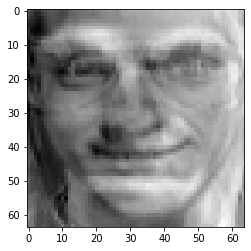

In [41]:
plt.imshow(pca.reshape((64,64)), cmap = plt.cm.gray)

In [18]:
Y = faces_centered.T*A.T
Y.shape

(4096, 400)

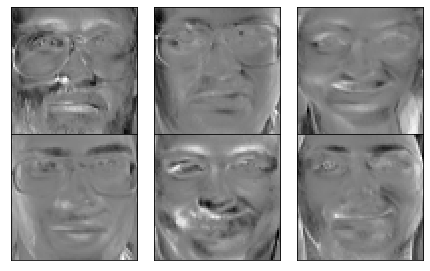

In [35]:
plot(faces_centered*pca)

In [20]:
data = faces_centered
pca1 = decomposition.PCA(n_components = n_components, svd_solver='randomized', whiten = True)
nfm = decomposition.NMF(n_components = n_components, init='nndsvda', tol = 5e-3)
ica = decomposition.FastICA(n_components=n_components, whiten=True)
sparsepca = decomposition.MiniBatchSparsePCA(n_components=n_components, alpha=0.8,n_iter=100, batch_size=3,random_state=rng)
dic = decomposition.MiniBatchDictionaryLearning(n_components=15, alpha=0.1,n_iter=50, batch_size=3,random_state=rng)

In [21]:
def test(estimador):
    global data
    global n_components
    estimador.fit(data)
    componentes = estimador.components_
    plot(componentes[:n_components])
    print(componentes)

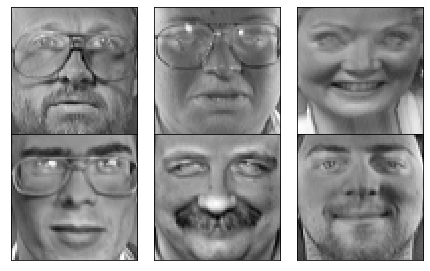

In [40]:
plot(faces_centered)

[[-4.03518017e-03 -4.01823732e-03 -4.59039835e-03 ... -2.31690764e-03
  -1.33679815e-03 -1.23782137e-03]
 [-6.00657779e-03 -7.00208096e-03 -7.92863129e-03 ...  2.11866587e-03
   2.15746298e-03  2.10535563e-03]
 [-2.43645748e-04  8.04206248e-04  1.61211319e-03 ...  4.40508734e-03
   2.48091350e-03  1.54457628e-03]
 ...
 [-1.81785252e-03 -2.60448299e-03 -3.75941309e-03 ... -1.80588695e-03
  -8.38637366e-04 -8.09283396e-04]
 [-1.30691820e-03 -1.06568861e-03 -6.64469242e-04 ...  1.17683983e-03
   5.63058969e-04  5.27108697e-04]
 [ 8.76688604e-04  2.35465266e-03  4.82743395e-03 ... -6.55266196e-05
  -6.12085679e-04 -3.79544520e-04]]


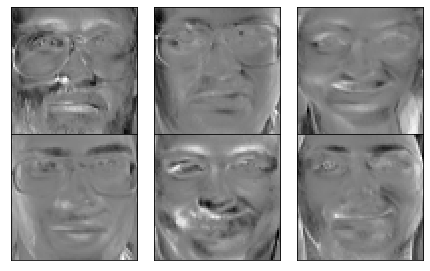

In [37]:
plot(faces_centered*pca)
print(faces_centered*pca)

[[-2.8501166e-02 -3.2102775e-02 -3.5724469e-02 ...  2.5691560e-02
   2.2447787e-02  2.0309422e-02]
 [ 9.1389258e-04  5.9981190e-05  1.0097463e-03 ... -2.0016184e-02
  -1.8690081e-02 -1.6674569e-02]
 [ 1.0534633e-02  3.2659939e-03 -8.0596665e-03 ...  5.4798760e-02
   5.6021325e-02  5.3406276e-02]
 [-1.7121388e-02 -1.4098782e-02 -1.6198862e-02 ... -2.8484616e-02
  -3.0669555e-02 -3.1811588e-02]
 [ 3.1438868e-02  3.4798075e-02  3.2731947e-02 ... -6.4962655e-03
  -8.0953985e-03 -6.1215344e-03]
 [-3.4186527e-02 -2.5833124e-02 -1.7445749e-02 ... -9.9041574e-03
  -1.4104298e-02 -1.1183834e-02]]


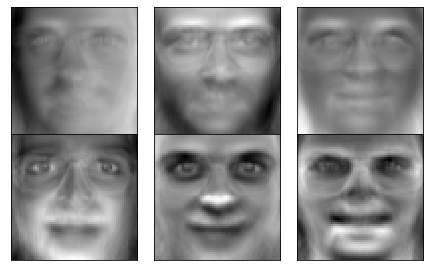

In [22]:
test(pca1)

[[ 1.17415845e-03  1.16002866e-03  1.01521889e-03 ... -4.07647516e-04
  -3.86472688e-04 -3.57879842e-04]
 [-3.61917656e-04 -1.51409221e-04  8.78422168e-05 ... -1.40985881e-04
  -2.19055044e-04 -9.49796675e-05]
 [ 6.53479847e-04  6.94520991e-04  8.11270986e-04 ... -4.77331392e-04
  -4.16230631e-04 -3.84295329e-04]
 [ 1.11195526e-04 -8.74526613e-05 -1.23902533e-04 ...  2.21458414e-04
   3.42204420e-04  3.12868296e-04]
 [ 7.94815147e-04  6.05359750e-04  3.38767104e-04 ...  1.23951096e-03
   1.31512871e-03  1.25786201e-03]
 [-5.11999823e-04 -3.96125081e-04 -3.32836566e-04 ... -8.67462416e-04
  -8.91115975e-04 -8.77724346e-04]]


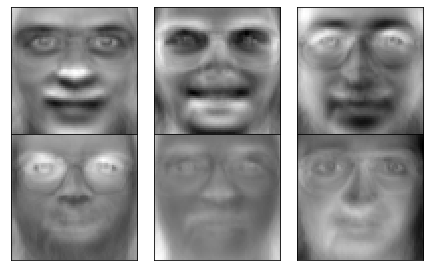

In [23]:
test(ica)

[[ 0.          0.          0.         ... -0.01631979 -0.01045968
  -0.00857967]
 [ 0.04816194  0.06403103  0.07939456 ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ... -0.0750877  -0.06995037
  -0.06242554]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]]


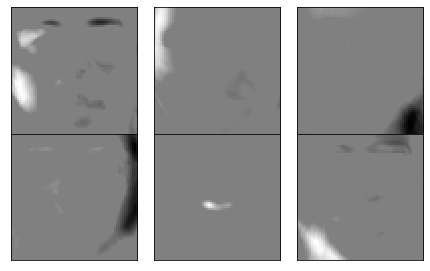

In [26]:
test(sparsepca)

[[ 0.00010918  0.00161915 -0.00169144 ...  0.02952346  0.02249529
   0.01850859]
 [ 0.02267676  0.02682041  0.02389941 ... -0.03764552 -0.02618197
  -0.0287095 ]
 [ 0.00120175 -0.00696937 -0.01610754 ...  0.00552821  0.00987437
   0.01189676]
 ...
 [-0.02323239 -0.02208126 -0.02125702 ... -0.00097664 -0.01447541
  -0.01933728]
 [-0.01451824 -0.01746494 -0.01726211 ...  0.0081008   0.00372755
   0.00639818]
 [-0.01604338 -0.02262239 -0.02880238 ...  0.03248815  0.03848558
   0.03459138]]


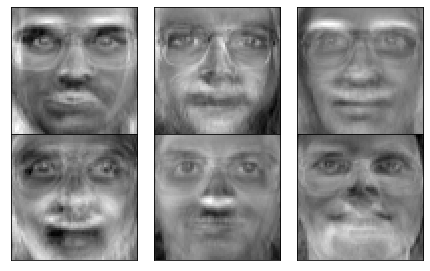

In [25]:
test(dic)